In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
# import matplotlib.pyplot as plt # Visualizations
#import seaborn as sb

In [2]:
#Load Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [ ]:
# Normalizing the data (making length = 1)
x_train = tf.keras.utils.normalize(X_train, axis=1)
x_test = tf.keras.utils.normalize(X_test, axis=1)

To be able to use the dataset in Keras API, we need 4-dims numpy arrays. 

In [3]:
# x_train.shape

(60000, 28, 28)

In [4]:
# x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
# x_test = x_test.reshape(x_test.shape[0], 28, 28,1)

In [5]:
# # Making sure that the values are float so that we can get decimal points after division
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')

In [6]:
# x_train = x_train/255.0 # Normalize
# x_test = x_test/255.0

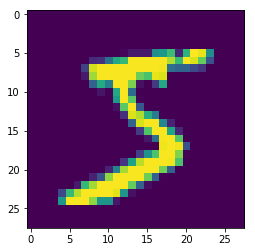

In [13]:
# import matplotlib.pyplot as plt
# plt.imshow(x_train[0][:,:,0])
# plt.show()

In [6]:
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


# Convolutional Neural Network
* Using Keras with tensorflow backend
* Final Dense layer must have 10 neurons since we have 10 number classes (0, 1, 2, …, 9).
* Experiment with kernel size, pool size, activation functions, dropout rate, and number of neurons in the first Dense layer to get a better result.

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPool2D

input_shape = (28, 28, 1)

model = Sequential()
model.add( Conv2D(28, kernel_size=(3,3), input_shape=input_shape) )
model.add( MaxPool2D( pool_size=(2,2) ) )
model.add( Flatten() )
model.add( Dense(128, activation='relu') )
model.add( Dropout(0.2) )
model.add( Dense(10, activation='softmax') )

Using TensorFlow backend.


# Compiling and Fitting the Model

* A non-optimized empty CNN is created.
* Now Set an optimizer with a given loss function which uses a metric. ( model.Compile() )
* Fit the model by using training data. ( model.fit() )

In [8]:
model.compile( 
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(
    x = x_train,
    y = y_train,
    epochs=10
)

Epoch 1/10
60000/60000 [==============================] - 47s 775us/step - loss: 0.2112 - acc: 0.9370
Epoch 2/10
60000/60000 [==============================] - 44s 736us/step - loss: 0.0840 - acc: 0.9746
Epoch 3/10
60000/60000 [==============================] - 43s 717us/step - loss: 0.0592 - acc: 0.9817
Epoch 4/10
60000/60000 [==============================] - 43s 711us/step - loss: 0.0470 - acc: 0.9845
Epoch 5/10
60000/60000 [==============================] - 43s 715us/step - loss: 0.0366 - acc: 0.9881
Epoch 6/10
60000/60000 [==============================] - 43s 715us/step - loss: 0.0301 - acc: 0.9901
Epoch 7/10
60000/60000 [==============================] - 43s 718us/step - loss: 0.0253 - acc: 0.9915
Epoch 8/10
60000/60000 [==============================] - 43s 721us/step - loss: 0.0215 - acc: 0.9932
Epoch 9/10
60000/60000 [==============================] - 43s 715us/step - loss: 0.0227 - acc: 0.9923
Epoch 10/10
60000/60000 [==============================] - 48s 795us/step - loss: 

In [9]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 281us/step


[0.06860043836263795, 0.9833]

In [10]:
model_json = model.to_json()
with open("model.json", "w") as jsonFile:
    jsonFile.write(model_json)

In [11]:
model.save_weights("Model_mnist.h5")